<a href="https://colab.research.google.com/github/frfusch21/DTS_GGU_5/blob/Elisabeth-S/tarif_all_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [39]:
df_all = pd.read_csv('all-data_clean.csv')
df_all.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec
0,1,Quito,2016-09-17 09:32:06,2016-09-17 10:05:51,0.632055,0.528947,-78.549447,-0.361363,N,2025,24228,346
1,2,Guadalajara Easy Taxi,2016-09-17 09:59:54,2016-09-17 10:06:23,0.327804,0.391950,-103.366600,20.686971,N,389,2962,3675
2,3,Monterrey,2016-09-17 10:06:52,2016-09-17 10:09:40,0.140910,0.563280,-100.165737,25.619387,N,168,951,0
3,4,Monterrey,2016-09-17 09:45:56,2016-09-17 10:13:34,0.207565,0.590416,-100.491721,25.676294,N,1659,11082,358
4,5,Monterrey,2016-09-17 10:12:00,2016-09-17 10:16:31,0.128881,0.580419,-100.104166,25.643862,N,272,2021,3614


[Text(0.5, 1.0, 'Grafik Persebaran Jumlah Vendor')]

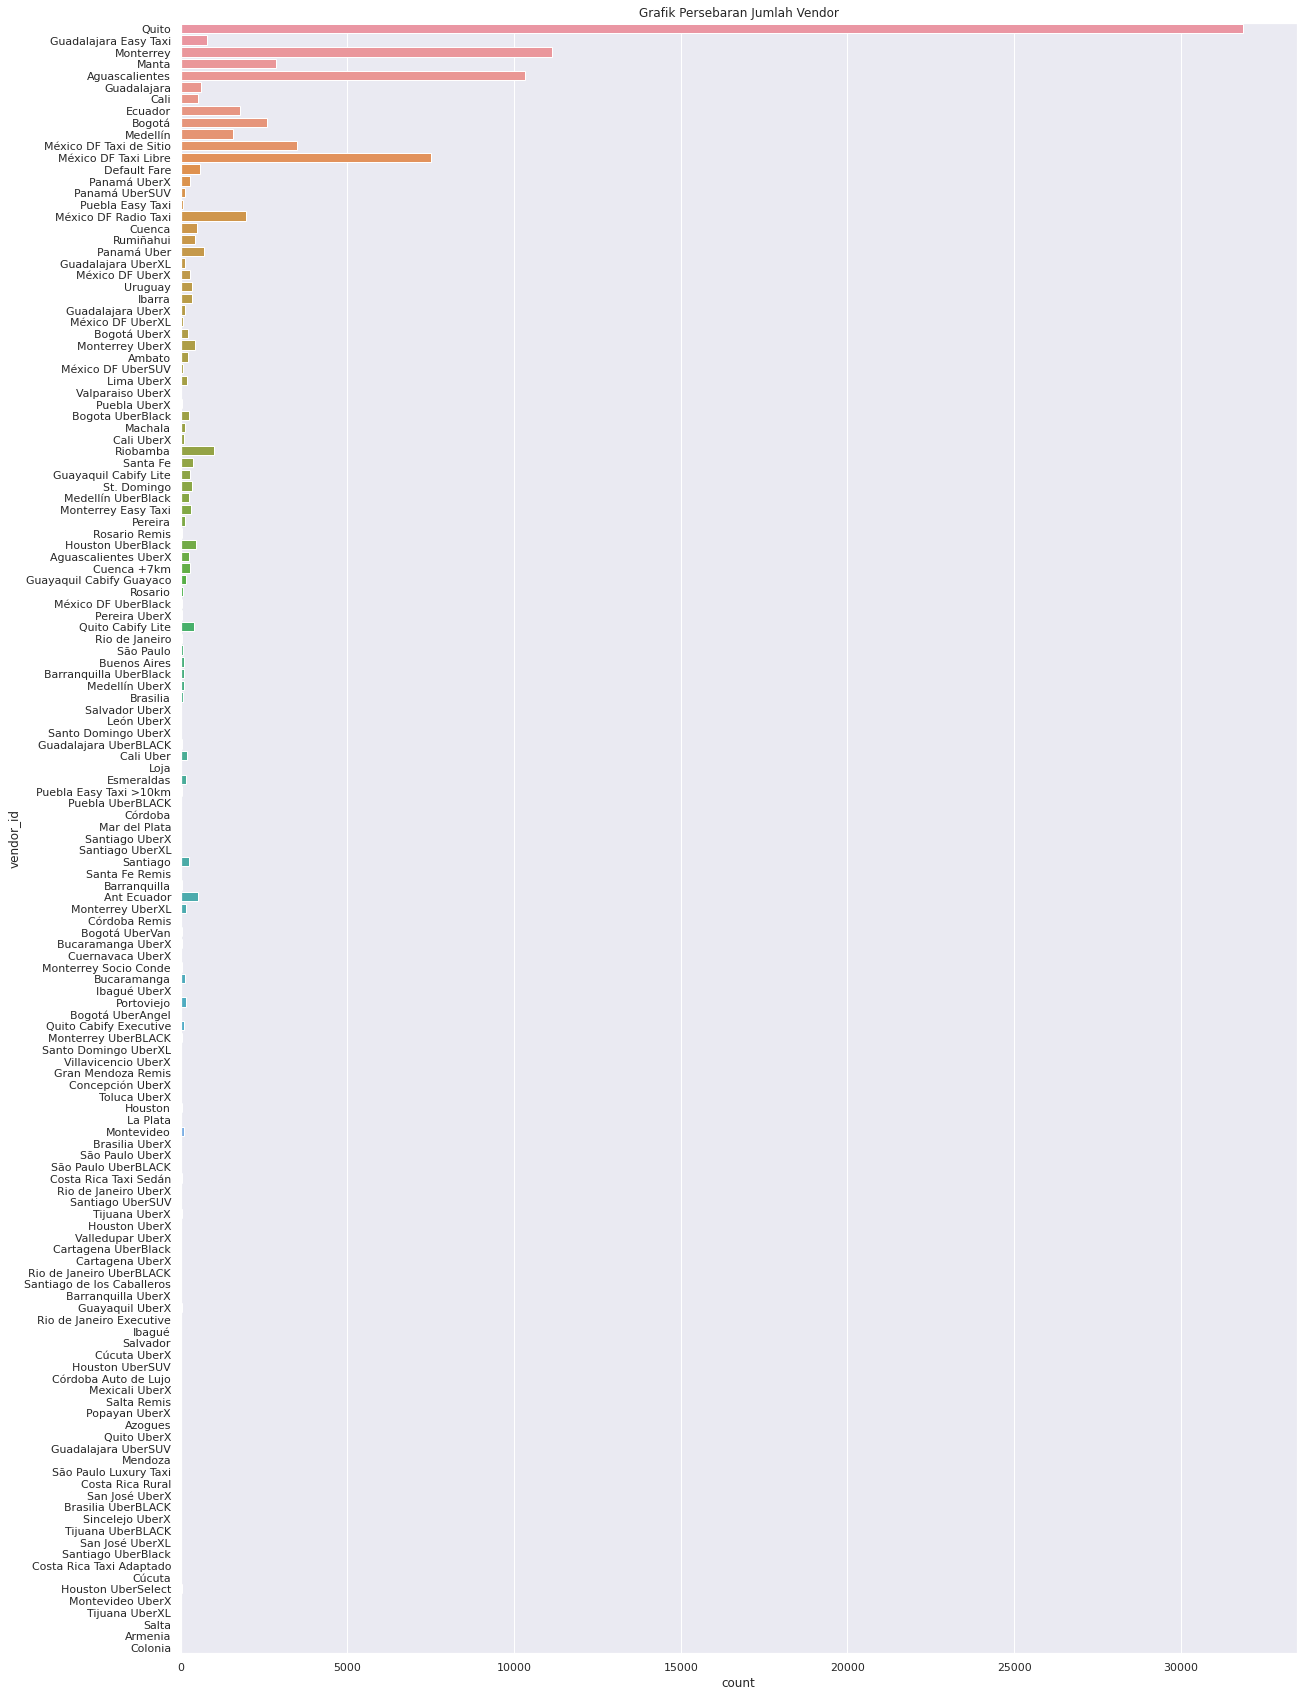

In [91]:
sns.set(rc = {'figure.figsize':(20,30)})
sns.countplot(data = df_all, y = df_all['vendor_id']).set(title='Grafik Persebaran Jumlah Vendor')

#Explore all data

In [92]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90287 entries, 0 to 90286
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  90287 non-null  int64         
 1   vendor_id           90287 non-null  object        
 2   pickup_datetime     90287 non-null  datetime64[ns]
 3   dropoff_datetime    90287 non-null  datetime64[ns]
 4   pickup_longitude    90287 non-null  float64       
 5   pickup_latitude     90287 non-null  float64       
 6   dropoff_longitude   90287 non-null  float64       
 7   dropoff_latitude    90287 non-null  float64       
 8   store_and_fwd_flag  90287 non-null  object        
 9   trip_duration       90287 non-null  int64         
 10  dist_meters         90287 non-null  int64         
 11  wait_sec            90287 non-null  int64         
 12  pickup_day          90287 non-null  object        
 13  pickup_date         90287 non-null  object    

In [93]:
#mengubah bentuk data pickup dan dropoff datetime ke bentuk datetime
df_all['pickup_datetime'] = pd.to_datetime(df_all.pickup_datetime, format='%Y-%m-%d %H:%M')
df_all['dropoff_datetime'] = pd.to_datetime(df_all.dropoff_datetime, format='%Y-%m-%d %H:%M')
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90287 entries, 0 to 90286
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  90287 non-null  int64         
 1   vendor_id           90287 non-null  object        
 2   pickup_datetime     90287 non-null  datetime64[ns]
 3   dropoff_datetime    90287 non-null  datetime64[ns]
 4   pickup_longitude    90287 non-null  float64       
 5   pickup_latitude     90287 non-null  float64       
 6   dropoff_longitude   90287 non-null  float64       
 7   dropoff_latitude    90287 non-null  float64       
 8   store_and_fwd_flag  90287 non-null  object        
 9   trip_duration       90287 non-null  int64         
 10  dist_meters         90287 non-null  int64         
 11  wait_sec            90287 non-null  int64         
 12  pickup_day          90287 non-null  object        
 13  pickup_date         90287 non-null  object    

In [94]:
#membuat field pick_day pada dataset yang berisi hari pickup berdasarkan pickup_datetime
df_all['pickup_day'] = df_all['pickup_datetime'].dt.day_name()
#membuat field pick_date untuk memisahkan informasi tanggal pickup
df_all['pickup_date'] = df_all['pickup_datetime'].dt.date
df_all

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec,pickup_day,pickup_date
0,1,Quito,2016-09-17 09:32:06,2016-09-17 10:05:51,0.632055,0.528947,-78.549447,-0.361363,N,2025,24228,346,Saturday,2016-09-17
1,2,Guadalajara Easy Taxi,2016-09-17 09:59:54,2016-09-17 10:06:23,0.327804,0.391950,-103.366600,20.686971,N,389,2962,3675,Saturday,2016-09-17
2,3,Monterrey,2016-09-17 10:06:52,2016-09-17 10:09:40,0.140910,0.563280,-100.165737,25.619387,N,168,951,0,Saturday,2016-09-17
3,4,Monterrey,2016-09-17 09:45:56,2016-09-17 10:13:34,0.207565,0.590416,-100.491721,25.676294,N,1659,11082,358,Saturday,2016-09-17
4,5,Monterrey,2016-09-17 10:12:00,2016-09-17 10:16:31,0.128881,0.580419,-100.104166,25.643862,N,272,2021,3614,Saturday,2016-09-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90282,90283,Quito,2016-10-25 04:58:55,2016-10-25 05:00:25,0.706498,0.552770,-78.550306,-0.256756,N,91,43,70,Tuesday,2016-10-25
90283,90284,Bogotá,2016-10-26 04:27:39,2016-10-28 06:50:28,0.369432,0.762872,-74.050725,4.714622,N,138169,5934,354,Wednesday,2016-10-26
90284,90285,México DF Taxi de Sitio,2016-10-28 06:49:41,2016-10-28 06:51:25,0.089643,0.308893,-99.194622,19.396717,N,104,49,96,Friday,2016-10-28
90285,90286,Quito,2016-10-28 06:47:59,2016-10-28 06:58:31,0.431407,0.724499,-78.446296,-0.327428,N,633,3296,150,Friday,2016-10-28


In [95]:
#membuat dataset pickup yang berisi tanggal pickup dan jumlah pickup dan mengurutkannya dari kecil ke besar
pickup = pd.DataFrame(df_all.groupby(['pickup_date'])['id'].count())
pickup = pickup.reset_index()
pickup = pickup.sort_values('pickup_date', ascending=True)
pickup

,pickup_date,id
0,2014-12-31,2
1,2016-05-13,1
2,2016-05-27,1
3,2016-05-28,1
4,2016-05-31,1
...,...,...
415,2017-07-28,314
416,2017-07-29,223
417,2017-07-30,157
418,2017-07-31,245


In [96]:
#menghapus data pertama dr dataset pickup
pickup = pickup.drop(index=0)
pickup

,pickup_date,id
1,2016-05-13,1
2,2016-05-27,1
3,2016-05-28,1
4,2016-05-31,1
5,2016-06-03,1
...,...,...
415,2017-07-28,314
416,2017-07-29,223
417,2017-07-30,157
418,2017-07-31,245


[Text(0.5, 1.0, 'Grafik Jumlah Pickup taxi tahun 2016 - 2017')]

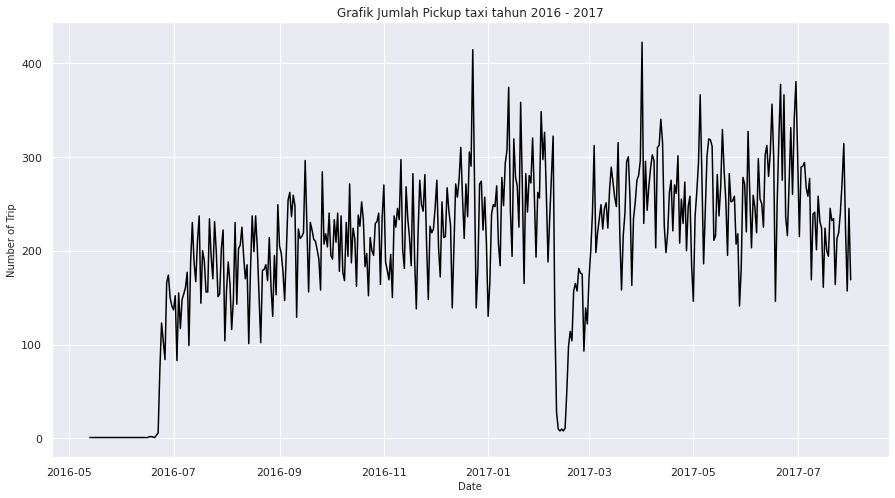

In [97]:
#membuat grafik garis pickup
graph = sns.set(rc = {'figure.figsize':(15,8)})
graph = sns.lineplot(data= pickup, x ='pickup_date', y = 'id', color = 'black')
graph.set_xlabel("Date", fontsize = 10)
graph.set_ylabel("Number of Trip", fontsize = 10)
graph.set(title='Grafik Jumlah Pickup taxi tahun 2016 - 2017')

#Tarif taxi per km

In [4]:
tarif = pd.read_csv('taxi_fare.csv')
tarif.head()

,vendor_id,base_fare,fare_per_km
0,Bogotá,1.16,1.62
1,Bogota UberBlack,0.74,0.24
2,Bogotá UberX,0.54,0.14
3,Bogotá UberVan,1.24,0.31
4,Bogotá UberAngel,NaN,NaN


In [5]:
tarif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   vendor_id    139 non-null    object 
 1   base_fare    110 non-null    float64
 2   fare_per_km  110 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.4+ KB


In [54]:
#menggabungkan all data dengan data tarif
df_merge = df_all.merge(tarif, how='inner', on='vendor_id')
#menghapus data yang kosong
df_merge= df_merge.dropna()
df_merge

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec,pickup_day,pickup_date,base_fare,fare_per_km
0,1,Quito,2016-09-17 09:32:06,2016-09-17 10:05:51,0.632055,0.528947,-78.549447,-0.361363,N,2025,24228,346,Saturday,2016-09-17,0.55,0.33
1,44,Quito,2016-09-18 04:03:20,2016-09-18 04:26:30,0.436887,0.792406,-78.490786,-0.104836,N,1390,16680,456,Sunday,2016-09-18,0.55,0.33
2,47,Quito,2016-09-16 06:29:36,2016-09-18 06:41:33,0.478847,0.104321,-78.470277,-0.131083,N,130317,1987,290,Friday,2016-09-16,0.55,0.33
3,49,Quito,2016-09-18 05:57:47,2016-09-18 06:30:00,0.713110,0.679551,-78.430220,-0.201934,N,1933,25146,302,Sunday,2016-09-18,0.55,0.33
4,53,Quito,2016-09-18 07:58:42,2016-09-18 08:14:29,0.674707,0.380694,-78.504558,-0.222462,N,948,4625,314,Sunday,2016-09-18,0.55,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90277,87987,Tijuana UberXL,2017-04-10 06:59:50,2017-04-10 07:01:05,0.339428,0.726466,-116.872946,32.458792,N,76,72,35,Monday,2017-04-10,0.97,0.41
90278,69404,Salta,2017-05-26 07:33:13,2017-05-26 07:35:38,0.357880,0.665188,-64.971178,-25.797915,N,146,539,46,Friday,2017-05-26,0.18,0.18
90279,69406,Salta,2017-05-26 07:36:00,2017-05-26 07:39:55,0.357871,0.665475,-64.967498,-25.794986,N,235,805,76,Friday,2017-05-26,0.18,0.18
90280,73394,Salta,2016-08-16 12:42:35,2016-12-06 10:30:07,0.358042,0.679712,-65.238940,-26.819285,N,9712052,3080,1096,Tuesday,2016-08-16,0.18,0.18


In [58]:
#hitung tarif
#tarif km pertama adalah base_fare, dan untuk km selanjutnya adalah base_fare + fare per km
def total_fare(df_merge):
  if df_merge['dist_meters']/1000 < 1:
    return df_merge['base_fare']
  else:
    return df_merge['base_fare']+((df_merge['dist_meters']/1000)*df_merge['fare_per_km'])


In [59]:
#memasukkan hasil perhitungan ke dalam df_merge
df_merge = df_merge.assign(total_fare=df_merge.apply(total_fare, axis=1))
df_merge

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec,pickup_day,pickup_date,base_fare,fare_per_km,total_fare
0,1,Quito,2016-09-17 09:32:06,2016-09-17 10:05:51,0.632055,0.528947,-78.549447,-0.361363,N,2025,24228,346,Saturday,2016-09-17,0.55,0.33,8.54524
1,44,Quito,2016-09-18 04:03:20,2016-09-18 04:26:30,0.436887,0.792406,-78.490786,-0.104836,N,1390,16680,456,Sunday,2016-09-18,0.55,0.33,6.05440
2,47,Quito,2016-09-16 06:29:36,2016-09-18 06:41:33,0.478847,0.104321,-78.470277,-0.131083,N,130317,1987,290,Friday,2016-09-16,0.55,0.33,1.20571
3,49,Quito,2016-09-18 05:57:47,2016-09-18 06:30:00,0.713110,0.679551,-78.430220,-0.201934,N,1933,25146,302,Sunday,2016-09-18,0.55,0.33,8.84818
4,53,Quito,2016-09-18 07:58:42,2016-09-18 08:14:29,0.674707,0.380694,-78.504558,-0.222462,N,948,4625,314,Sunday,2016-09-18,0.55,0.33,2.07625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90277,87987,Tijuana UberXL,2017-04-10 06:59:50,2017-04-10 07:01:05,0.339428,0.726466,-116.872946,32.458792,N,76,72,35,Monday,2017-04-10,0.97,0.41,0.97000
90278,69404,Salta,2017-05-26 07:33:13,2017-05-26 07:35:38,0.357880,0.665188,-64.971178,-25.797915,N,146,539,46,Friday,2017-05-26,0.18,0.18,0.18000
90279,69406,Salta,2017-05-26 07:36:00,2017-05-26 07:39:55,0.357871,0.665475,-64.967498,-25.794986,N,235,805,76,Friday,2017-05-26,0.18,0.18,0.18000
90280,73394,Salta,2016-08-16 12:42:35,2016-12-06 10:30:07,0.358042,0.679712,-65.238940,-26.819285,N,9712052,3080,1096,Tuesday,2016-08-16,0.18,0.18,0.73440


In [60]:
df_merge['total_fare'].describe()

count    8.395800e+04
mean     1.146010e+02
std      1.055944e+04
min      1.800000e-01
25%      1.434458e+00
50%      2.693020e+00
75%      5.491108e+00
max      1.052268e+06
Name: total_fare, dtype: float64

#Tarif/menit (53 data vendor)

In [67]:
tarif2 = pd.read_csv('uber and cabity.csv')
tarif2.head()

,vendor_id,base_fare,fare_per_km,fare_per_minute,minimum_charge
0,Bogota UberBlack,0.74,0.24,0.04,1.47
1,Bogotá UberX,0.54,0.14,0.03,1.29
2,Bogotá UberVan,1.24,0.31,0.07,2.21
3,Quito,0.55,0.33,0.10,1.75
4,Quito Cabify Lite,0.55,0.23,0.05,1.53


In [68]:
#menggabungkan all data dengan data dan menghapus data yang kosong
df_merge2 = df_all.merge(tarif2, how='inner', on='vendor_id')
df_merge2= df_merge2.dropna()
df_merge2

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec,pickup_day,pickup_date,base_fare,fare_per_km,fare_per_minute,minimum_charge
0,1,Quito,2016-09-17 09:32:06,2016-09-17 10:05:51,0.632055,0.528947,-78.549447,-0.361363,N,2025,24228,346,Saturday,2016-09-17,0.55,0.33,0.10,1.75
1,44,Quito,2016-09-18 04:03:20,2016-09-18 04:26:30,0.436887,0.792406,-78.490786,-0.104836,N,1390,16680,456,Sunday,2016-09-18,0.55,0.33,0.10,1.75
2,47,Quito,2016-09-16 06:29:36,2016-09-18 06:41:33,0.478847,0.104321,-78.470277,-0.131083,N,130317,1987,290,Friday,2016-09-16,0.55,0.33,0.10,1.75
3,49,Quito,2016-09-18 05:57:47,2016-09-18 06:30:00,0.713110,0.679551,-78.430220,-0.201934,N,1933,25146,302,Sunday,2016-09-18,0.55,0.33,0.10,1.75
4,53,Quito,2016-09-18 07:58:42,2016-09-18 08:14:29,0.674707,0.380694,-78.504558,-0.222462,N,948,4625,314,Sunday,2016-09-18,0.55,0.33,0.10,1.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36415,61092,Houston UberSelect,2017-03-20 01:03:45,2017-03-20 01:10:14,0.353191,0.194952,-63.181951,-17.812335,N,389,2131,139,Monday,2017-03-20,4.00,2.33,0.78,12.00
36416,66286,Houston UberSelect,2017-05-16 05:49:08,2017-05-16 06:21:49,0.392276,0.743892,-75.155960,39.965479,N,1962,7007,1201,Tuesday,2017-05-16,4.00,2.33,0.78,12.00
36417,61352,Montevideo UberX,2017-03-21 03:47:25,2017-03-21 03:49:29,0.343435,0.741781,-56.166955,-34.857936,N,124,26,154,Tuesday,2017-03-21,0.82,0.29,0.11,1.92
36418,65634,Tijuana UberXL,2017-05-13 11:11:27,2017-05-13 11:17:20,0.339689,0.727167,-117.045230,32.526856,N,354,33,232,Saturday,2017-05-13,0.97,0.41,0.10,2.18


In [69]:
#menghitung tarif berdasarkan trip duration
#tarif per menit berlaku apa bila kecepatan taxi <= tarif per menit/tarif per km, selain daripada itu berlaku tarif normal
def fare(df_merge2):
  if (df_merge2['dist_meters']/1000)/(df_merge2['trip_duration']/3600) <= (60*df_merge2['fare_per_minute'])/df_merge2['fare_per_km']:
    return df_merge2['base_fare']+((df_merge2['trip_duration']/60)*df_merge2['fare_per_minute'])
  else:
    return df_merge2['base_fare']+((df_merge2['dist_meters']/1000)*df_merge2['fare_per_km'])
df_merge2 = df_merge2.assign(fare=df_merge2.apply(fare, axis=1))

In [70]:
df_merge

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec,pickup_day,pickup_date,base_fare,fare_per_km,total_fare
0,1,Quito,2016-09-17 09:32:06,2016-09-17 10:05:51,0.632055,0.528947,-78.549447,-0.361363,N,2025,24228,346,Saturday,2016-09-17,0.55,0.33,8.54524
1,44,Quito,2016-09-18 04:03:20,2016-09-18 04:26:30,0.436887,0.792406,-78.490786,-0.104836,N,1390,16680,456,Sunday,2016-09-18,0.55,0.33,6.05440
2,47,Quito,2016-09-16 06:29:36,2016-09-18 06:41:33,0.478847,0.104321,-78.470277,-0.131083,N,130317,1987,290,Friday,2016-09-16,0.55,0.33,1.20571
3,49,Quito,2016-09-18 05:57:47,2016-09-18 06:30:00,0.713110,0.679551,-78.430220,-0.201934,N,1933,25146,302,Sunday,2016-09-18,0.55,0.33,8.84818
4,53,Quito,2016-09-18 07:58:42,2016-09-18 08:14:29,0.674707,0.380694,-78.504558,-0.222462,N,948,4625,314,Sunday,2016-09-18,0.55,0.33,2.07625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90277,87987,Tijuana UberXL,2017-04-10 06:59:50,2017-04-10 07:01:05,0.339428,0.726466,-116.872946,32.458792,N,76,72,35,Monday,2017-04-10,0.97,0.41,0.97000
90278,69404,Salta,2017-05-26 07:33:13,2017-05-26 07:35:38,0.357880,0.665188,-64.971178,-25.797915,N,146,539,46,Friday,2017-05-26,0.18,0.18,0.18000
90279,69406,Salta,2017-05-26 07:36:00,2017-05-26 07:39:55,0.357871,0.665475,-64.967498,-25.794986,N,235,805,76,Friday,2017-05-26,0.18,0.18,0.18000
90280,73394,Salta,2016-08-16 12:42:35,2016-12-06 10:30:07,0.358042,0.679712,-65.238940,-26.819285,N,9712052,3080,1096,Tuesday,2016-08-16,0.18,0.18,0.73440


In [71]:
df_merge2['fare'].describe()

count     36317.000000
mean         90.929496
std        3835.756272
min        -647.301667
25%           1.517230
50%           2.353450
75%           4.296490
max      708670.153510
Name: fare, dtype: float64